In [375]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,median_absolute_error, r2_score,mean_squared_error
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor, RandomForestRegressor
from sklearn import preprocessing

In [277]:
df = pd.read_excel('data.xlsx', sheet_name='Assignment-1')

In [278]:
df.head()

,Date,product,phase,campaign_platform,campaign_type,communication_medium,subchannel,audience_type,creative_type,creative_name,device,age,spends,impressions,clicks,link_clicks
0,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,0.00,2,0,0.0
1,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,25-34,0.00,5,0,0.0
2,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,35-44,0.00,1,0,0.0
3,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,Undetermined,14.63,5,3,0.0
4,2019-10-18,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,53.31,10,2,0.0


In [10]:
df.describe()

,spends,impressions,clicks,link_clicks
count,16834.000000,16834.000000,16834.000000,16288.000000
mean,148.694236,287.959190,11.977783,2.170371
std,483.895724,2444.450313,44.796963,18.659132
min,0.000000,0.000000,0.000000,0.000000
25%,0.180000,3.000000,0.000000,0.000000
50%,22.535000,13.000000,2.000000,0.000000
75%,110.020000,64.000000,8.000000,0.000000
max,9221.960000,67454.000000,1075.000000,450.000000


# Exploratory Data Analysis

In [22]:
# calculating the null values in then 
df.isna().sum()

Date                      0
product                   0
phase                     0
campaign_platform         0
campaign_type             0
communication_medium      0
subchannel                0
audience_type             0
creative_type             0
creative_name             0
device                    0
age                       0
spends                    0
impressions               0
clicks                    0
link_clicks             546
dtype: int64

In [26]:
# caluclating null value percentage in the link_clicks column
df.link_clicks.isna().sum() * 100 /df.link_clicks.count()

3.3521611001964637

In [44]:
# calculating value counts for each column
for col in df.columns:
    print(col + "-" + str(df[col].value_counts().count()))

Date-257
product-1
phase-1
campaign_platform-2
campaign_type-2
communication_medium-2
subchannel-4
audience_type-4
creative_type-3
creative_name-4
device-4
age-7
spends-9087
impressions-1188
clicks-263
link_clicks-160


In [49]:
df['campaign_platform'].value_counts()

Google Ads      15101
Facebook Ads     1733
Name: campaign_platform, dtype: int64

In [50]:
df['campaign_type'].value_counts()

Search         15101
Conversions     1733
Name: campaign_type, dtype: int64

In [51]:
df['communication_medium'].value_counts()

Search Keywords    15101
Creative            1733
Name: communication_medium, dtype: int64

In [53]:
df['subchannel'].value_counts()

Brand           7853
Generic         4544
Competitor      2704
Facebook Ads    1733
Name: subchannel, dtype: int64

In [54]:
df['audience_type'].value_counts()

'-            15101
Audience 1      813
Audience 2      738
Audience 3      182
Name: audience_type, dtype: int64

In [55]:
df['creative_type'].value_counts()

'-          15101
Image        1130
Carousal      603
Name: creative_type, dtype: int64

In [56]:
df['creative_name'].value_counts()

'-          15101
Click         644
Carousal      603
Girl          486
Name: creative_name, dtype: int64

In [57]:
df['device'].value_counts()

Mobile     7357
Desktop    6318
device     1733
Tablet     1426
Name: device, dtype: int64

In [58]:
df['age'].value_counts()

25-34           3097
35-44           2865
Undetermined    2586
45-54           2499
18-24           2472
55-64           1757
65 or more      1558
Name: age, dtype: int64

In [65]:
df.dtypes

Date                    datetime64[ns]
product                         object
phase                           object
campaign_platform               object
campaign_type                   object
communication_medium            object
subchannel                      object
audience_type                   object
creative_type                   object
creative_name                   object
device                          object
age                             object
spends                         float64
impressions                      int64
clicks                           int64
link_clicks                    float64
dtype: object

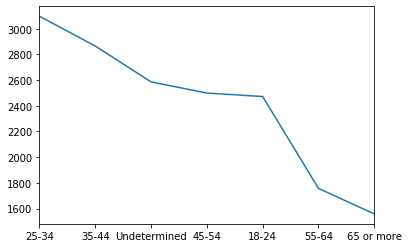

In [72]:
# plotting the age distribution
df['age'].value_counts().plot();

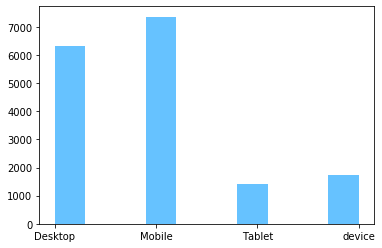

In [73]:
# plotting the device counts in the data
plt.hist(data=df, x='device',color = '#66c2ff');

In [92]:
df[df['campaign_platform'] == 'Google Ads'][['audience_type', 'creative_type', 'creative_name']].nunique

<bound method DataFrame.nunique of       audience_type creative_type creative_name
0                '-            '-            '-
1                '-            '-            '-
2                '-            '-            '-
3                '-            '-            '-
4                '-            '-            '-
...             ...           ...           ...
16829            '-            '-            '-
16830            '-            '-            '-
16831            '-            '-            '-
16832            '-            '-            '-
16833            '-            '-            '-

[15101 rows x 3 columns]>

In [96]:
df[df['campaign_platform'] == 'Facebook Ads']['subchannel'].value_counts()

Facebook Ads    1733
Name: subchannel, dtype: int64

In [100]:
df[df['campaign_platform'] == 'Facebook Ads']['communication_medium'].value_counts()

Creative    1733
Name: communication_medium, dtype: int64

In [118]:
df[df['campaign_platform'] == 'Facebook Ads']['campaign_type'].value_counts()

Conversions    1733
Name: campaign_type, dtype: int64

In [123]:
df[df['campaign_platform'] == 'Google Ads']['link_clicks'].value_counts()

0.0    15101
Name: link_clicks, dtype: int64

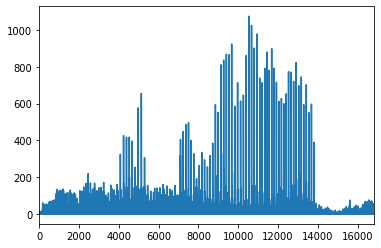

In [151]:
df['clicks'].plot();

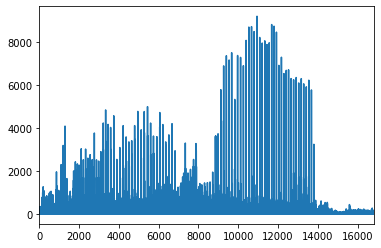

In [152]:
df['spends'].plot();

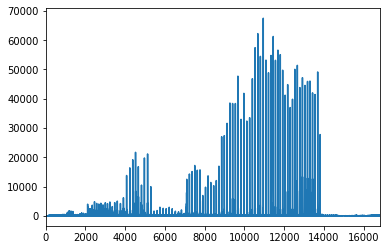

In [153]:
df['impressions'].plot();

### The numeric data is uniformly spread and there are no major outliers 

### The data of the Facebook ads and Google ads does not interesect. Hence its better to build seperate models for each one of them

# Statistical Analysis

In [134]:
# mean clicks per campaign_platform
df.groupby('campaign_platform').mean()['clicks'].reset_index()

,campaign_platform,clicks
0,Facebook Ads,44.759954
1,Google Ads,8.215681


In [135]:
# mean spends per campaign_platform
df.groupby('campaign_platform').mean()['spends'].reset_index()

,campaign_platform,spends
0,Facebook Ads,325.513855
1,Google Ads,128.402308


In [155]:
# mean spends per campaign_platform
df.groupby('campaign_platform').mean()['impressions'].reset_index()

,campaign_platform,impressions
0,Facebook Ads,2348.881708
1,Google Ads,51.446460


In [194]:
# mean clicks per age
age_clicks = df.groupby('age').mean()['clicks'].reset_index()
age_clicks

,age,clicks
0,18-24,11.417476
1,25-34,32.881821
2,35-44,11.285166
3,45-54,3.425770
4,55-64,0.857143
5,65 or more,1.189987
6,Undetermined,10.565352


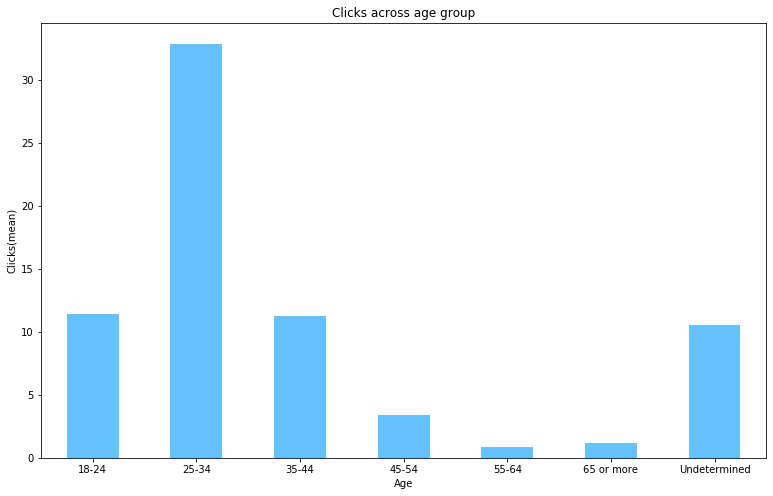

In [195]:
age_clicks.plot(kind='bar', 
           x='age',
           y='clicks',
           color = '#66c2ff', 
           figsize =(13,8), 
           title = "Clicks across age group", 
           legend = False);
plt.xlabel('Age');
plt.xticks(rotation=360)
plt.ylabel('Clicks(mean)');

In [193]:
# mean spends per age
age_spends = df.groupby('age').mean()['spends'].reset_index()
age_spends

,age,spends
0,18-24,186.011153
1,25-34,362.477476
2,35-44,127.892883
3,45-54,36.803980
4,55-64,12.002340
5,65 or more,16.833042
6,Undetermined,160.481906


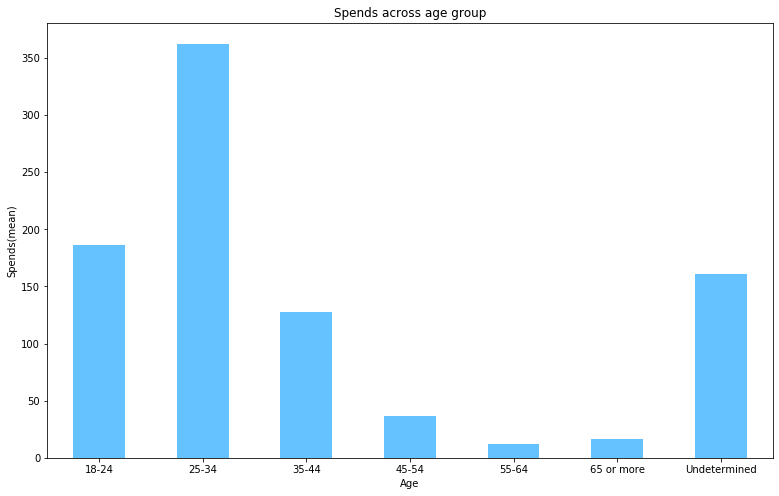

In [196]:
age_spends.plot(kind='bar', 
           x='age',
           y='spends',
           color = '#66c2ff', 
           figsize =(13,8), 
           title = "Spends across age group", 
           legend = False);
plt.xlabel('Age');
plt.xticks(rotation=360)
plt.ylabel('Spends(mean)');

In [197]:
# mean clicks per device 
device_clicks = df.groupby('device').mean()['clicks'].reset_index()
device_clicks

,device,clicks
0,Desktop,4.633745
1,Mobile,12.824249
2,Tablet,0.309257
3,device,44.759954


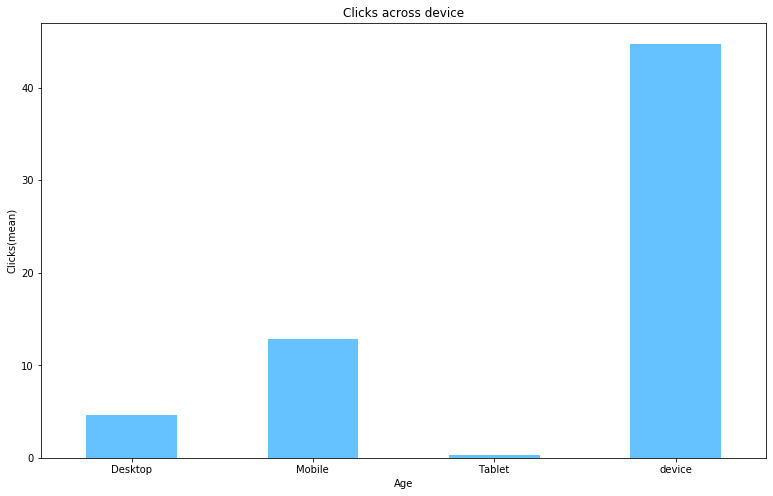

In [198]:
device_clicks.plot(kind='bar', 
           x='device',
           y='clicks',
           color = '#66c2ff', 
           figsize =(13,8), 
           title = "Clicks across device", 
           legend = False);
plt.xlabel('Age');
plt.xticks(rotation=360)
plt.ylabel('Clicks(mean)');

## Goggle Ads ananlysis

In [517]:
# creating a dataframe containing only Google Ads campaign platform
google_df = df[df['campaign_platform'] == 'Google Ads']
google_df.head()

,Date,product,phase,campaign_platform,campaign_type,communication_medium,subchannel,audience_type,creative_type,creative_name,device,age,spends,impressions,clicks,link_clicks
0,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,0.00,2,0,0.0
1,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,25-34,0.00,5,0,0.0
2,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,35-44,0.00,1,0,0.0
3,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,Undetermined,14.63,5,3,0.0
4,2019-10-18,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,53.31,10,2,0.0


In [168]:
# mean clicks per subchannel in the google ads
google_df.groupby('subchannel').mean()['clicks'].reset_index()

,subchannel,clicks
0,Brand,8.899402
1,Competitor,3.865015
2,Generic,9.623019


In [169]:
# mean spends per subchannel in the google ads
google_df.groupby('subchannel').mean()['spends'].reset_index()

,subchannel,spends
0,Brand,85.006601
1,Competitor,96.251069
2,Generic,222.531587


## Facebook Ads Ananlysis

In [447]:
# creating a dataframe containing only Facebook Ads campaign platform
fb_df = df[df['campaign_platform'] == 'Facebook Ads']
fb_df.head()

,Date,product,phase,campaign_platform,campaign_type,communication_medium,subchannel,audience_type,creative_type,creative_name,device,age,spends,impressions,clicks,link_clicks
2009,2019-12-16,Product 1,Performance,Facebook Ads,Conversions,Creative,Facebook Ads,Audience 2,Carousal,Carousal,device,25-34,70.28,730,12,9.0
2010,2019-12-16,Product 1,Performance,Facebook Ads,Conversions,Creative,Facebook Ads,Audience 2,Carousal,Carousal,device,35-44,7.66,71,1,1.0
2011,2019-12-16,Product 1,Performance,Facebook Ads,Conversions,Creative,Facebook Ads,Audience 2,Carousal,Carousal,device,45-54,3.80,32,1,NaN
2012,2019-12-16,Product 1,Performance,Facebook Ads,Conversions,Creative,Facebook Ads,Audience 2,Carousal,Carousal,device,55-64,0.45,3,0,NaN
2013,2019-12-16,Product 1,Performance,Facebook Ads,Conversions,Creative,Facebook Ads,Audience 2,Image,Click,device,25-34,117.13,638,36,21.0


In [178]:
# mean clicks per audience_type
fb_df.groupby('audience_type').mean()['clicks'].reset_index()

,audience_type,clicks
0,Audience 1,75.731857
1,Audience 2,19.861789
2,Audience 3,7.368132


In [179]:
# mean spends per audience_type
fb_df.groupby('audience_type').mean()['spends'].reset_index()

,audience_type,spends
0,Audience 1,594.413973
1,Audience 2,103.198333
2,Audience 3,25.805385


In [180]:
# mean spends per creative_type
fb_df.groupby('creative_type').mean()['spends'].reset_index()

,creative_type,spends
0,Carousal,84.921609
1,Image,453.900690


In [181]:
# mean clicks per creative_type
fb_df.groupby('creative_type').mean()['clicks'].reset_index()

,creative_type,clicks
0,Carousal,9.152570
1,Image,63.761062


In [182]:
# mean spends per creative_name
fb_df.groupby('creative_name').mean()['spends'].reset_index()

,creative_name,spends
0,Carousal,84.921609
1,Click,712.014643
2,Girl,111.873148


In [183]:
# mean clicks per creative_name
fb_df.groupby('creative_name').mean()['clicks'].reset_index()

,creative_name,clicks
0,Carousal,9.152570
1,Click,95.822981
2,Girl,21.275720


In [184]:
# mean link_clicks per audience_type
fb_df.groupby('audience_type').mean()['link_clicks'].reset_index()

,audience_type,link_clicks
0,Audience 1,45.381188
1,Audience 2,14.817623
2,Audience 3,6.655914


# Predictive Modeling

## ML model for Google Ads

In [518]:
# feature selection
google_df = google_df[['Date', 'subchannel', 'device', 'age', 'impressions', 'clicks']]
google_df

,Date,subchannel,device,age,impressions,clicks
0,2019-10-16,Brand,Desktop,18-24,2,0
1,2019-10-16,Brand,Desktop,25-34,5,0
2,2019-10-16,Brand,Desktop,35-44,1,0
3,2019-10-16,Brand,Desktop,Undetermined,5,3
4,2019-10-18,Brand,Desktop,18-24,10,2
...,...,...,...,...,...,...
16829,2020-07-07,Brand,Mobile,25-34,36,15
16830,2020-07-07,Brand,Mobile,35-44,11,1
16831,2020-07-07,Brand,Mobile,45-54,3,0
16832,2020-07-07,Brand,Mobile,65 or more,3,0


In [519]:
# converting objects in to integers(0,1,2..)
le = preprocessing.LabelEncoder()
google_df['device'] = le.fit_transform(google_df['device'])
google_df['age'] = le.fit_transform(google_df['age'])
google_df['subchannel'] = le.fit_transform(google_df['subchannel'])

# converting date into integer
google_df['Date'] = google_df['Date'].dt.strftime("%Y%m%d").astype(int)

In [540]:
# selecting features and target 
X = google_df.drop(columns=['clicks'])
Y = google_df['clicks']

In [541]:
# spliting into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

In [542]:
# initializing the model
ga = RandomForestRegressor(n_estimators=200, max_depth=25, random_state=1, max_features=0.5) 

In [543]:
# fitting the data on train set and predicting on test set
ga.fit(X_train , y_train)

# predicting the output
y_pred = ga.predict(X_test)

In [544]:
# calculating error
mean_absolute_error(y_pred,y_test)

2.1178442964214725

In [545]:
median_absolute_error(y_pred,y_test)

0.975

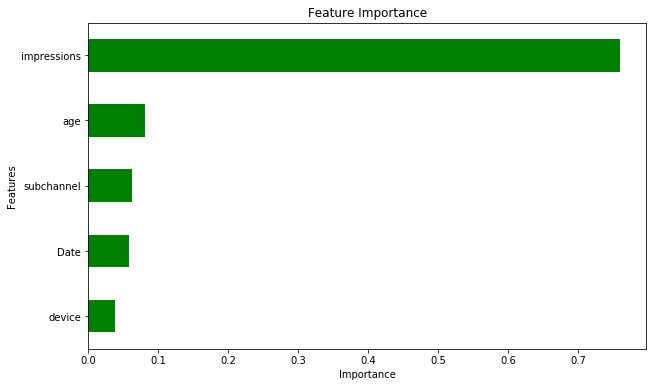

In [547]:
importances_rf = pd.Series(ga.feature_importances_, index = X.columns) 
sorted_importances_rf = importances_rf.sort_values().tail(6)
sorted_importances_rf.plot(kind='barh', color='green', figsize=(10,6)); 
plt.title('Feature Importance')
plt.xlabel('Importance');
plt.ylabel('Features');
plt.show(); 

## ML model for Facebook Ads

In [548]:
# feature selection
facebook_df = fb_df.drop(columns=['product', 'phase', 'campaign_platform', 'campaign_type', 'communication_medium', 
                                  'subchannel', 'spends'])

In [549]:
facebook_df.head()

,Date,audience_type,creative_type,creative_name,device,age,impressions,clicks,link_clicks
2009,2019-12-16,Audience 2,Carousal,Carousal,device,25-34,730,12,9.0
2010,2019-12-16,Audience 2,Carousal,Carousal,device,35-44,71,1,1.0
2011,2019-12-16,Audience 2,Carousal,Carousal,device,45-54,32,1,NaN
2012,2019-12-16,Audience 2,Carousal,Carousal,device,55-64,3,0,NaN
2013,2019-12-16,Audience 2,Image,Click,device,25-34,638,36,21.0


In [550]:
# checking the count of the link_clicked column when clicks is 0
facebook_df[facebook_df['clicks'] == 0]['link_clicks'].count()

0

In [551]:
# dropping the link clicks column
facebook_df.drop('link_clicks', axis=1, inplace=True)

In [552]:
# converting objects in to integers(0,1,2..)
le = preprocessing.LabelEncoder()
facebook_df['device'] = le.fit_transform(facebook_df['device'])
facebook_df['age'] = le.fit_transform(facebook_df['age'])
facebook_df['creative_name'] = le.fit_transform(facebook_df['creative_name'])
facebook_df['audience_type'] = le.fit_transform(facebook_df['audience_type'])
facebook_df['creative_type'] = le.fit_transform(facebook_df['creative_type'])
facebook_df['device'] = le.fit_transform(facebook_df['device'])
facebook_df['age'] = le.fit_transform(facebook_df['age'])

# converting date into integer
facebook_df['Date'] = facebook_df['Date'].dt.strftime("%Y%m%d").astype(int)

In [553]:
# selecting features and target 
X = facebook_df.drop(columns=['clicks'])
Y = facebook_df['clicks']

In [554]:
# spliting into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

In [555]:
# initializing the model
fa = RandomForestRegressor(n_estimators=75, max_depth=20, random_state=1, max_features=0.5) 

In [556]:
# fitting the data on train set and predicting on test set
fa.fit(X_train , y_train)

# predicting the output
y_pred = fa.predict(X_test)

In [557]:
# calculating the error
mean_absolute_error(y_pred,y_test)

7.907756644252321

In [558]:
median_absolute_error(y_pred,y_test)

1.8799999999999917

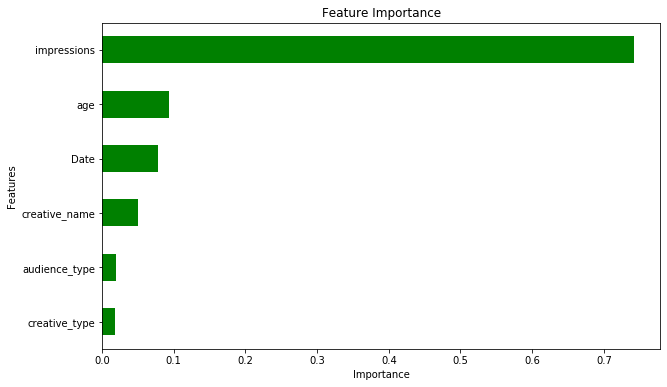

In [560]:
importances_rf = pd.Series(fa.feature_importances_, index = X.columns) 
sorted_importances_rf = importances_rf.sort_values().tail(6)
sorted_importances_rf.plot(kind='barh', color='green', figsize=(10,6)); 
plt.title('Feature Importance')
plt.xlabel('Importance');
plt.ylabel('Features');
plt.show(); 